# Main CSV

In [1]:
# Load Packages and Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Dataset
d1 = pd.read_csv('../data/BenchmarkingSample20230607.csv')
d1

Unit  Period  Days                  Account  Amount
0     00040302CD88       1    30                    Sales   89952
1     00040302CD88       2    31                    Sales   90594
2     00040302CD88       3    30                    Sales   81909
3     00040302CD88       4    31                    Sales   87418
4     00040302CD88       5    31                    Sales   91109
...            ...     ...   ...                      ...     ...
6043  0004030BEB57      20    30  Other Non-controllables    1455
6044  0004030BEB57      21    31  Other Non-controllables    7456
6045  0004030BEB57      22    31  Other Non-controllables    2037
6046  0004030BEB57      23    28  Other Non-controllables    2037
6047  0004030BEB57      24    31  Other Non-controllables    2037

[6048 rows x 5 columns]

In [3]:
# Make a new df with just negative values
d1n = d1[d1['Amount'] < 0].copy()
d1n

Unit  Period  Days                    Account  Amount
745   00040302D006       2    31                 Crew Labor     -46
746   00040302D006       3    30                 Crew Labor   -1394
1396  00040302D006       5    31  Other Labor-related Costs    -513
2168  00040302CD88       9    31                  Promotion    -303
2172  00040302CD88      13    30                  Promotion    -114
...            ...     ...   ...                        ...     ...
5964  00040302D014      13    30    Other Non-controllables   -2116
5988  0004030A635E      13    30    Other Non-controllables   -5470
6012  0004030B92EE      13    30    Other Non-controllables   -3232
6022  0004030B92EE      23    28    Other Non-controllables    -725
6036  0004030BEB57      13    30    Other Non-controllables   -3775

[133 rows x 5 columns]

In [4]:
# Check null values
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6048 entries, 0 to 6047
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Unit     6048 non-null   object
 1   Period   6048 non-null   int64 
 2   Days     6048 non-null   int64 
 3   Account  6048 non-null   object
 4   Amount   6048 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 236.4+ KB


In [5]:
# Describe csv
d1.describe()

Period         Days         Amount
count  6048.000000  6048.000000    6048.000000
mean     12.500000    30.416667   16741.724868
std       6.922759     0.862078   54557.719130
min       1.000000    28.000000  -14050.000000
25%       6.750000    30.000000     435.000000
50%      12.500000    31.000000    1899.000000
75%      18.250000    31.000000    7080.000000
max      24.000000    31.000000  573462.000000

In [6]:
# Commented out
# Make all values in amount positive
#d1['Amount'] = d1['Amount'].abs()

In [7]:
# Get unique values for Unit
d1['Unit'].value_counts()

00040302CD88    672
00040302CE36    672
00040302CF03    672
00040302CF28    672
00040302D006    672
00040302D014    672
0004030A635E    672
0004030B92EE    672
0004030BEB57    672
Name: Unit, dtype: int64

In [8]:
# Get unique values for Unit in the negative df
d1n['Unit'].value_counts()

00040302D006    41
00040302CD88    29
0004030BEB57    12
00040302CF28    11
00040302D014    11
00040302CE36    10
0004030B92EE     8
00040302CF03     7
0004030A635E     4
Name: Unit, dtype: int64

In [9]:
# Get unique values for Account
d1['Account'].value_counts()

Other Controllables          1512
Other Non-controllables      1080
Other Labor-related Costs     648
Maintenance & Repair          648
Sales                         216
Cost of Sales - Food          216
Cost of Sales - Paper         216
Crew Labor                    216
Management Labor              216
Advertising                   216
Promotion                     216
Outside Services              216
Utilities                     216
Rent                          216
Name: Account, dtype: int64

In [10]:
# Get unique values for Account in the negative df
d1n['Account'].value_counts()

Rent                         50
Other Controllables          41
Promotion                    18
Other Non-controllables      18
Maintenance & Repair          3
Crew Labor                    2
Other Labor-related Costs     1
Name: Account, dtype: int64

# Why are these accounts sometimes negative.
All are expenses and have a normal balance of debit. Is it possible they were recieving government assistance.

In [11]:
# Get unique values for Period
d1['Period'].value_counts()

1     252
2     252
23    252
22    252
21    252
20    252
19    252
18    252
17    252
16    252
15    252
14    252
13    252
12    252
11    252
10    252
9     252
8     252
7     252
6     252
5     252
4     252
3     252
24    252
Name: Period, dtype: int64

In [12]:
# Get unique values for Period in the negative df
d1n['Period'].value_counts()

7     11
9     10
13    10
5      8
21     7
14     7
18     7
2      7
23     6
8      6
6      5
4      5
3      5
16     5
19     5
20     4
10     4
12     4
24     4
15     3
17     3
22     3
11     2
1      2
Name: Period, dtype: int64

In [13]:
# Get unique values for Days
d1['Days'].value_counts()

31    3528
30    2016
28     504
Name: Days, dtype: int64

In [14]:
# Find the number of unique combinations of unit and period
num_unique_combinations = len(d1.groupby(['Unit', 'Period']))

print(num_unique_combinations)

216


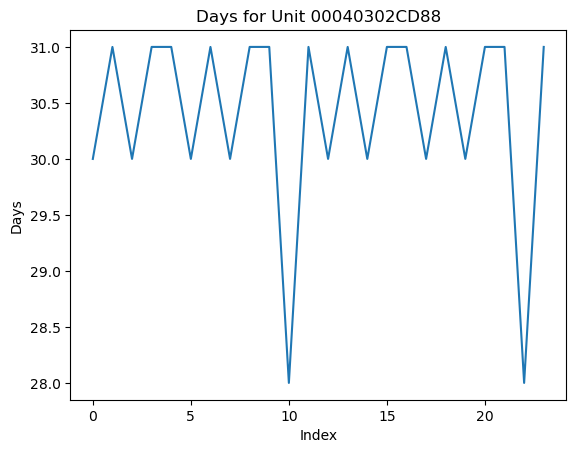

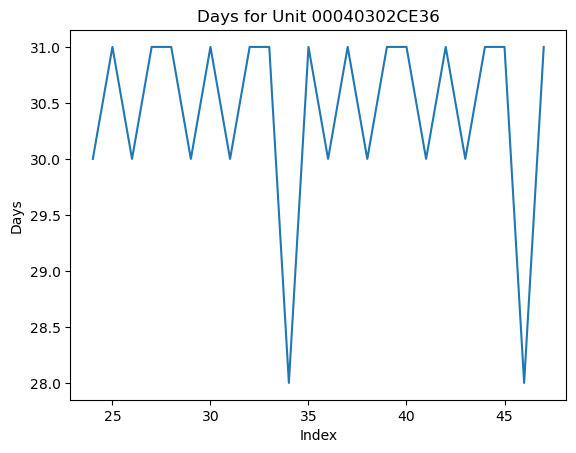

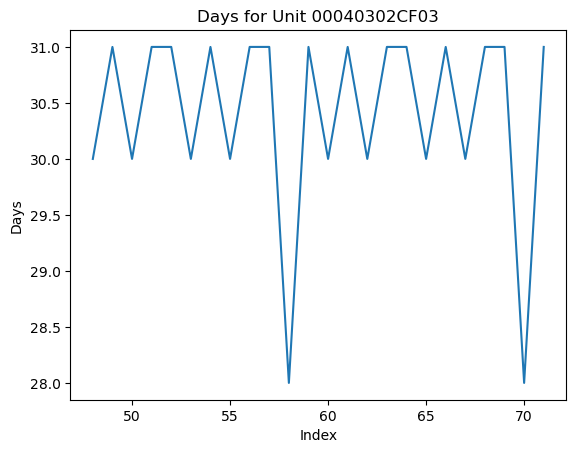

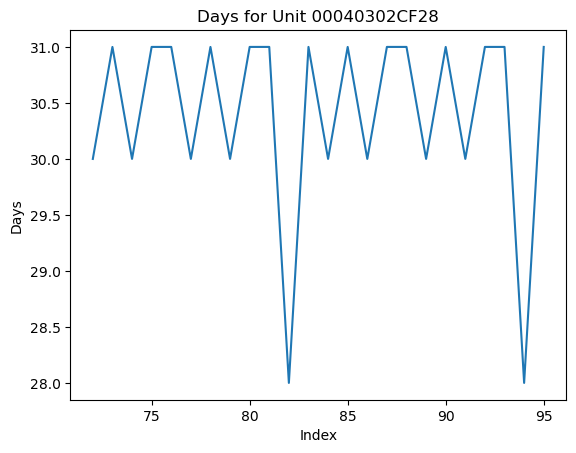

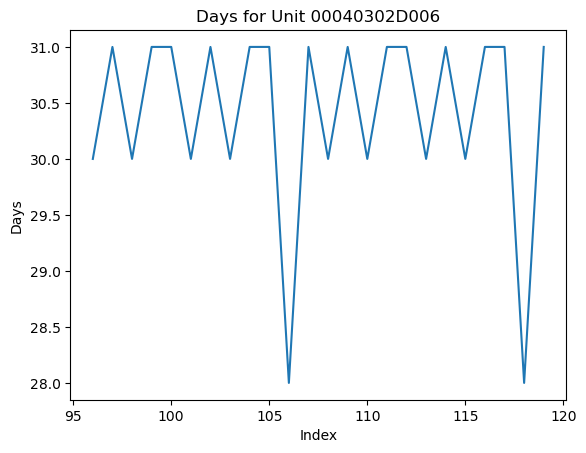

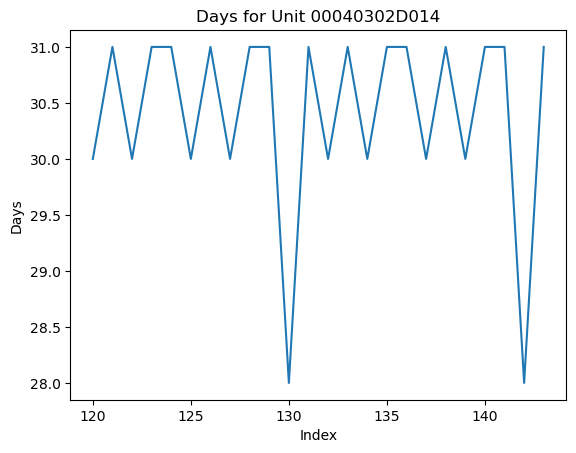

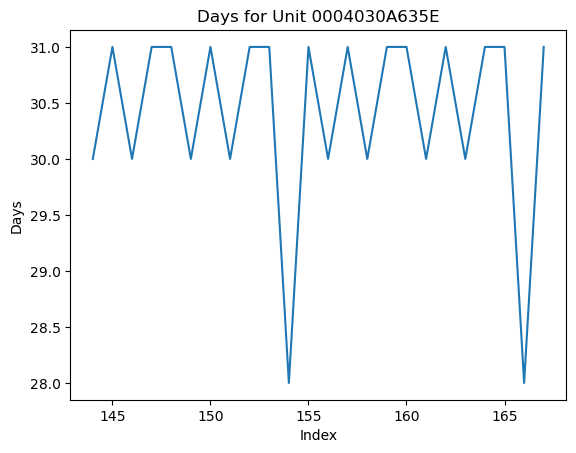

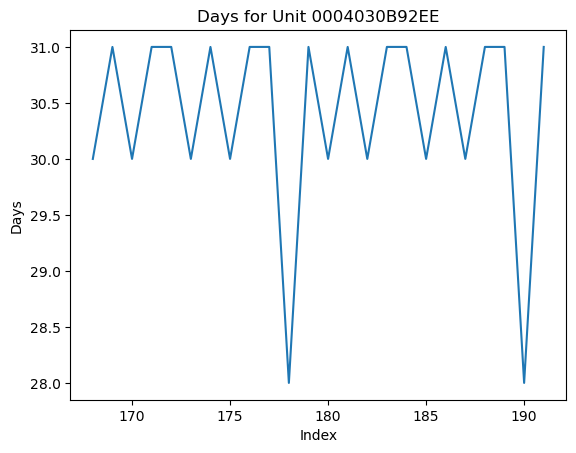

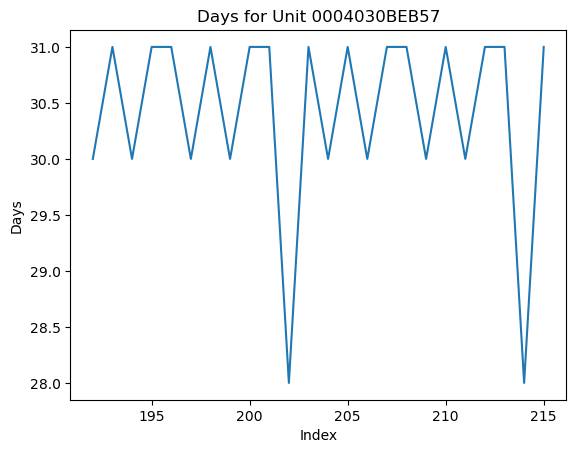

In [15]:
# Attempting to determine time frame
# I will begin by just looking at sales. Any account will do.
sales_d1 = d1[d1['Account'] == 'Sales'].copy()
# Now I will create separate line graphs for each unit with the number of days
units = d1['Unit'].unique()

# Iterate over the units
for unit in units:
    # Filter the data for the current unit
    unit_data = sales_d1[sales_d1['Unit'] == unit]
    
    # Create the line graph
    plt.plot(unit_data.index, unit_data['Days'])
    
    # Set the title and labels
    plt.title(f'Days for Unit {unit}')
    plt.xlabel('Index')
    plt.ylabel('Days')
    
    # Display the graph
    plt.show()

# Begins in April, Ends in March two years later.
I do not detect a substantial decline in sales. The pandemic began in march of 2020 so it is possible the data begins in 2020 and goes to 2022. More likely, I believe the data begins in 2021 and goes until 2022.

In [16]:
# Commented out
# Count the number of times each combination appears
#counts = d1.groupby(['Unit', 'Period']).size()
# Create csv
#counts.to_csv('counts.csv', index=True)

In [17]:
# Commented out
# Create csv
#d1n.to_csv('negatives.csv', index=True)

# Do a correlation matrix
## Use pivot to reshape data with columns for every account
## Pyplot or Seaborn

In [18]:
# reshape df
unmelt = d1.pivot_table(index=['Unit', 'Period'], columns='Account', values='Amount', aggfunc='sum').reset_index()

In [19]:
#display new df
unmelt

Account          Unit  Period  Advertising  Cost of Sales - Food  \
0        00040302CD88       1         3778                 20557   
1        00040302CD88       2         3805                 20876   
2        00040302CD88       3         3440                 19531   
3        00040302CD88       4         3672                 20999   
4        00040302CD88       5         3827                 21357   
..                ...     ...          ...                   ...   
211      0004030BEB57      20        15729                 99236   
212      0004030BEB57      21        12227                108507   
213      0004030BEB57      22        15255                101713   
214      0004030BEB57      23        15020                 98547   
215      0004030BEB57      24        17368                110366   

Account  Cost of Sales - Paper  Crew Labor  Maintenance & Repair  \
0                         2190         486                  5135   
1                         2058        1376                  1553   
2                         2291         178                  2321   
3                         2056       36597                  3412   
4                         2312       29942                  3345   
..                         ...         ...                   ...   
211                      10557       75243                  8789   
212                      13137       94509                  1704   
213                      10812       82894                  3256   
214                      11558       83338                  3605   
215                      10063       94112                  5267   

Account  Management Labor  Other Controllables  Other Labor-related Costs  \
0                    3983                 3167                       3429   
1                    4255                 3899                       3699   
2                    4241                 3646                       3614   
3                    5515                 2581                       6944   
4                    5484                 3772                       7109   
..                    ...                  ...                        ...   
211                  3997                 2729                      15678   
212                  4989                 6187                      15246   
213                  4278                 4408                      16168   
214                  5253                 3443                      16454   
215                  5433                 4094                      18421   

Account  Other Non-controllables  Outside Services  Promotion   Rent   Sales  \
0                           7879              8462        401   -610   89952   
1                           7918              5329        445   -178   90594   
2                           7471              5062        553   -527   81909   
3                           7537              5967        874   -353   87418   
4                           6385              5727        635   -167   91109   
..                           ...               ...        ...    ...     ...   
211                        26672             11476         -3  64375  374497   
212                        39347             16172      -1144  81337  424685   
213                        28140             11189       2665  58308  363205   
214                        27999             10646        608  56786  357611   
215                        30603             14421       1761  68428  413521   

Account  Utilities  
0             5690  
1             4917  
2             4692  
3             5699  
4             5109  
..             ...  
211           6230  
212           6480  
213           8236  
214           2656  
215           7001  

[216 rows x 16 columns]

In [20]:
# Describe unmelted data
unmelt.describe()

Account      Period   Advertising  Cost of Sales - Food  \
count    216.000000    216.000000            216.000000   
mean      12.500000  10232.944444          59979.949074   
std        6.938266   5709.846541          32676.102087   
min        1.000000   1860.000000           9850.000000   
25%        6.750000   5577.000000          34888.250000   
50%       12.500000   9667.500000          56010.500000   
75%       18.250000  13685.250000          82223.500000   
max       24.000000  23049.000000         147381.000000   

Account  Cost of Sales - Paper     Crew Labor  Maintenance & Repair  \
count               216.000000     216.000000            216.000000   
mean               6657.981481   54913.486111           3831.439815   
std                3482.848365   28617.832353           1800.365807   
min                 779.000000   -1394.000000            828.000000   
25%                4035.000000   36567.000000           2356.750000   
50%                6356.500000   51521.000000           3571.500000   
75%                8935.250000   75440.000000           4893.000000   
max               15690.000000  121605.000000          10831.000000   

Account  Management Labor  Other Controllables  Other Labor-related Costs  \
count          216.000000           216.000000                 216.000000   
mean          5509.726852          3710.106481               11412.055556   
std           2028.192336          1491.865569                5646.204915   
min            309.000000           901.000000                1556.000000   
25%           4094.000000          2640.000000                7425.000000   
50%           5080.500000          3455.500000               10530.000000   
75%           6961.250000          4604.250000               15020.250000   
max          16581.000000          8828.000000               25839.000000   

Account  Other Non-controllables  Outside Services    Promotion  \
count                 216.000000        216.000000   216.000000   
mean                18857.587963       7741.518519   674.166667   
std                  8737.498027       3498.089877   641.844993   
min                  6112.000000       1302.000000 -2087.000000   
25%                 12025.500000       4868.500000   365.000000   
50%                 17615.000000       7702.000000   621.500000   
75%                 24019.750000      10029.750000   965.500000   
max                 41028.000000      19983.000000  3574.000000   

Account           Rent          Sales     Utilities  
count       216.000000     216.000000    216.000000  
mean      31404.675926  247696.004630   6146.652778  
std       31797.739017  137009.910575   2409.998783  
min      -14050.000000   44281.000000   1030.000000  
25%         594.500000  133278.750000   4855.500000  
50%       26641.000000  230945.500000   6269.500000  
75%       56851.000000  337484.500000   7796.000000  
max      111586.000000  573462.000000  14096.000000

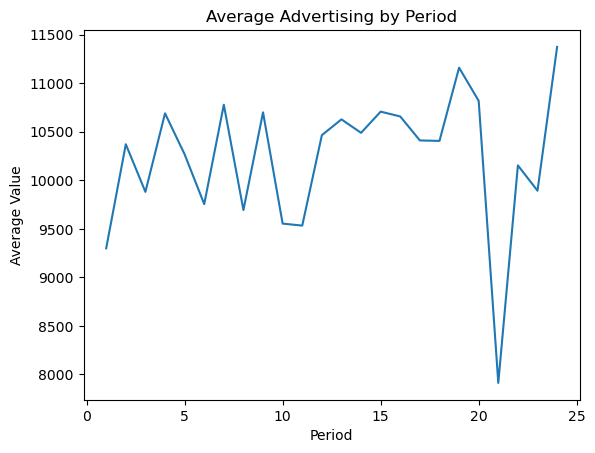

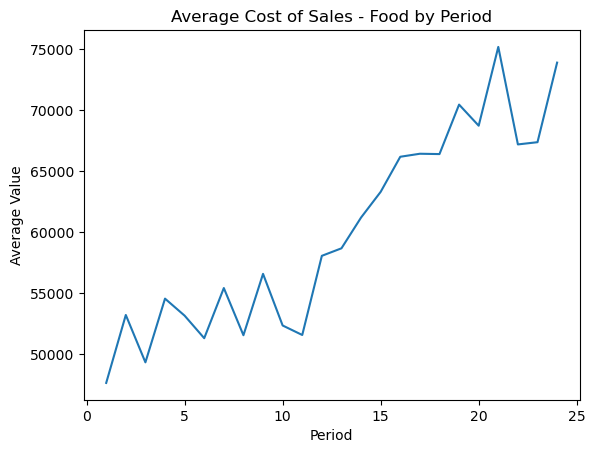

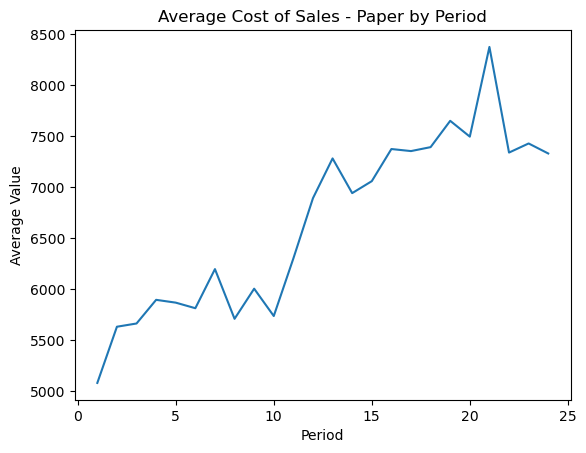

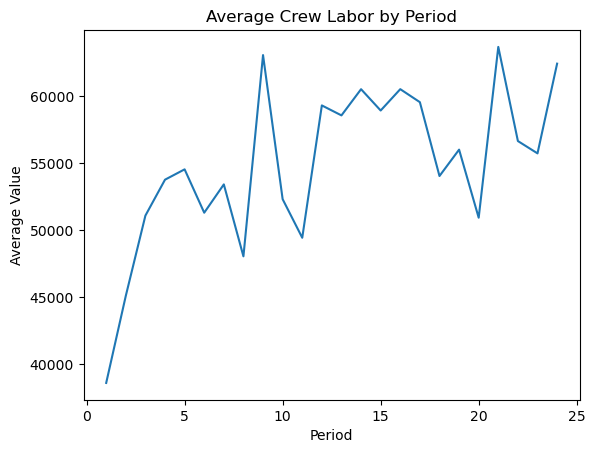

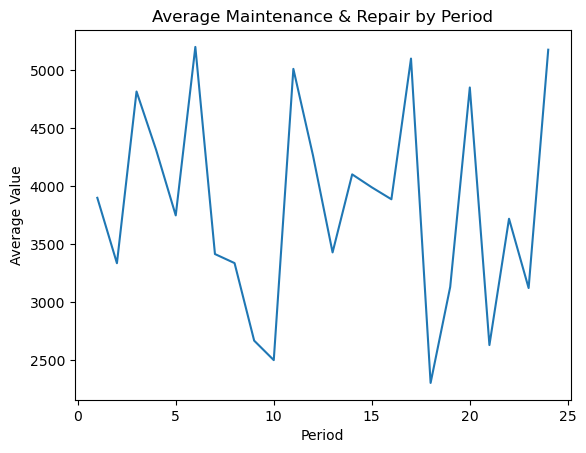

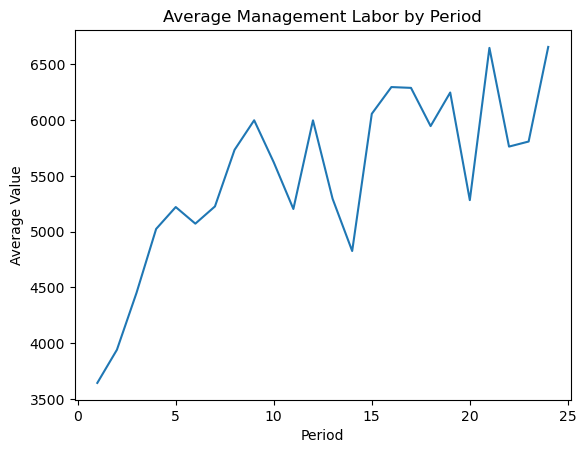

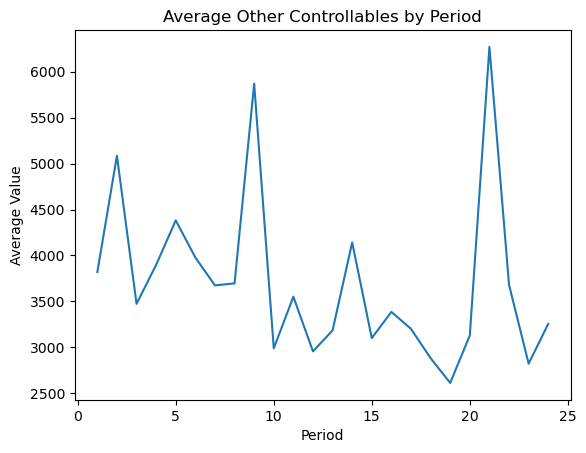

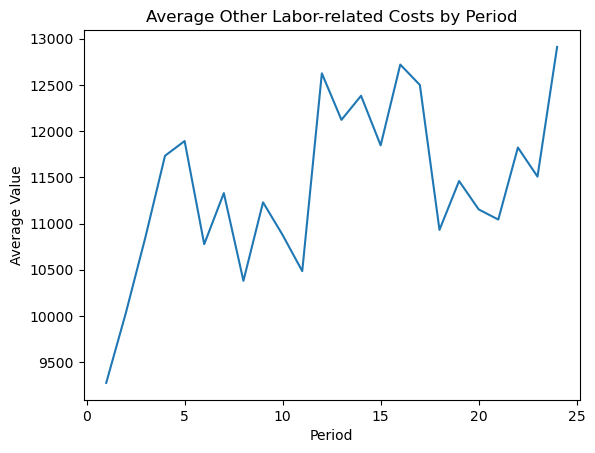

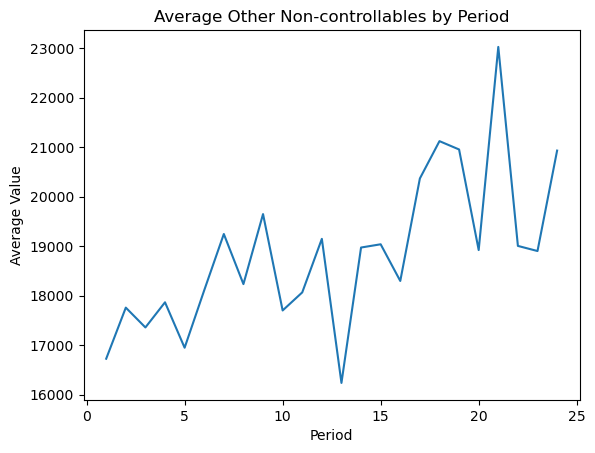

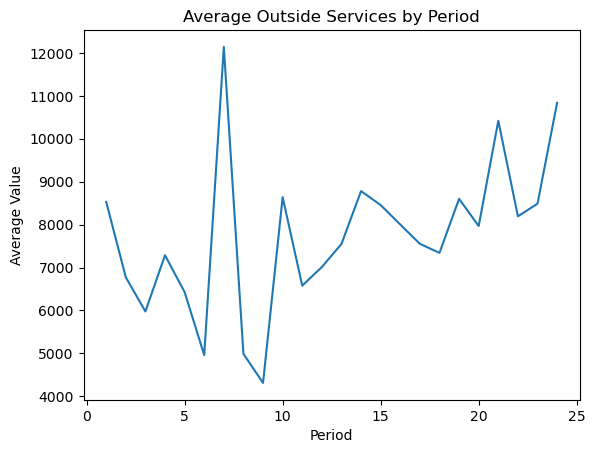

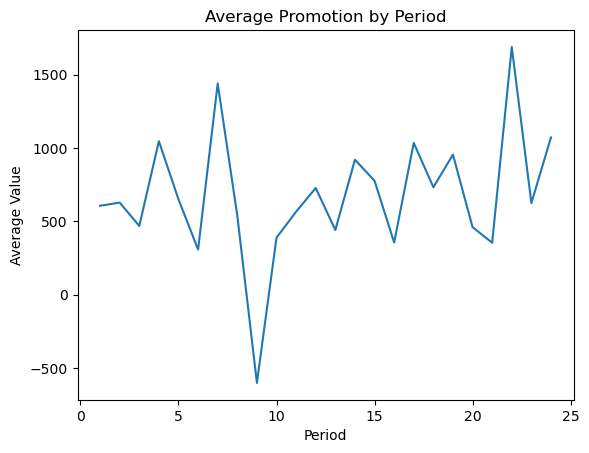

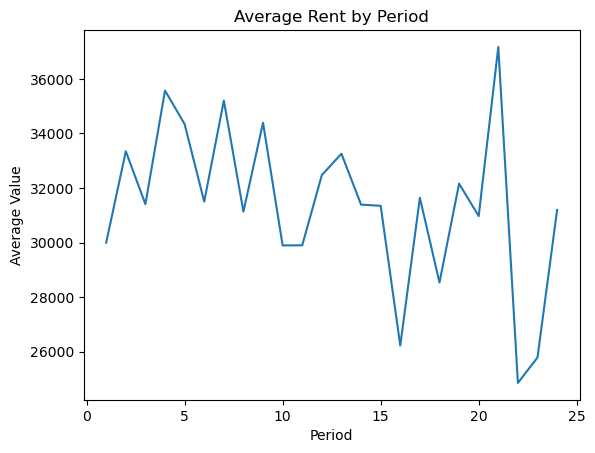

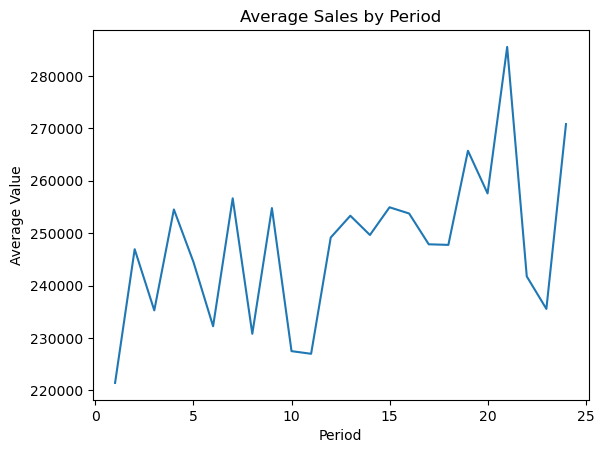

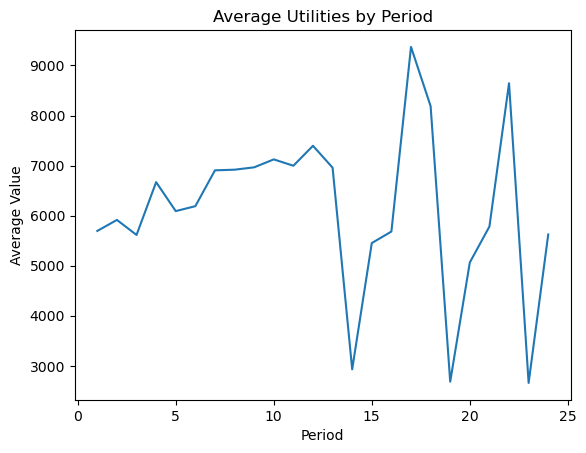

In [21]:
# Make a line chart of the average amount in each account over the dataset
account_columns = unmelt.columns[2:16]
periods = unmelt['Period'].unique()

# Iterate over the account columns
for account in account_columns:
    # Calculate the average value for each period and account
    account_avg = unmelt.groupby('Period')[account].mean()

    # Create the line chart
    plt.plot(account_avg.index, account_avg.values)

    # Set the title and labels
    plt.title(f'Average {account} by Period')
    plt.xlabel('Period')
    plt.ylabel('Average Value')

    # Display the chart
    plt.show()

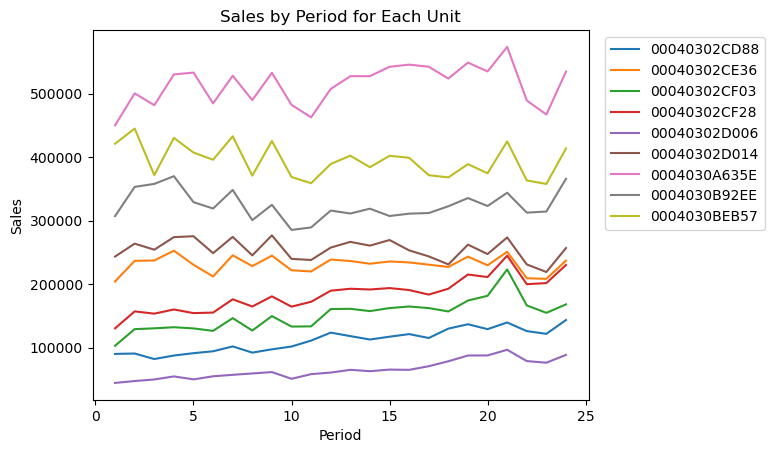

In [22]:
# Make a line chart of the amount in sales over the dataset
sales_data = unmelt.pivot(index='Unit', columns='Period', values='Sales')

# Create the line chart
ax = sales_data.T.plot()

# Set the title and labels
plt.title('Sales by Period for Each Unit')
plt.xlabel('Period')
plt.ylabel('Sales')

# Adjust the legend position
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

# Display the chart
plt.show()


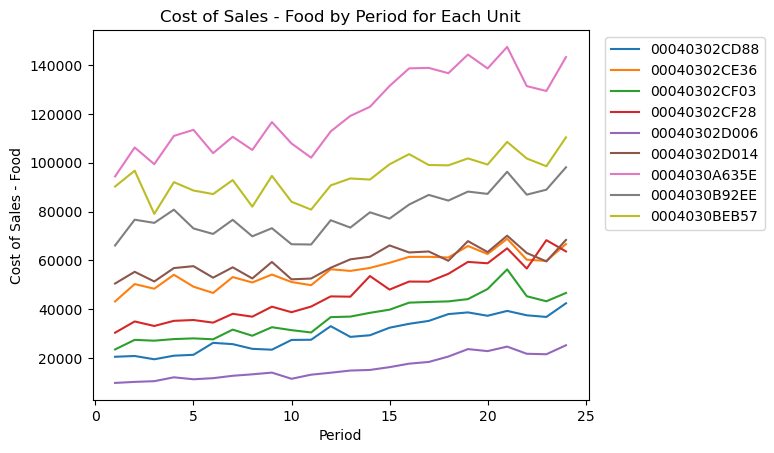

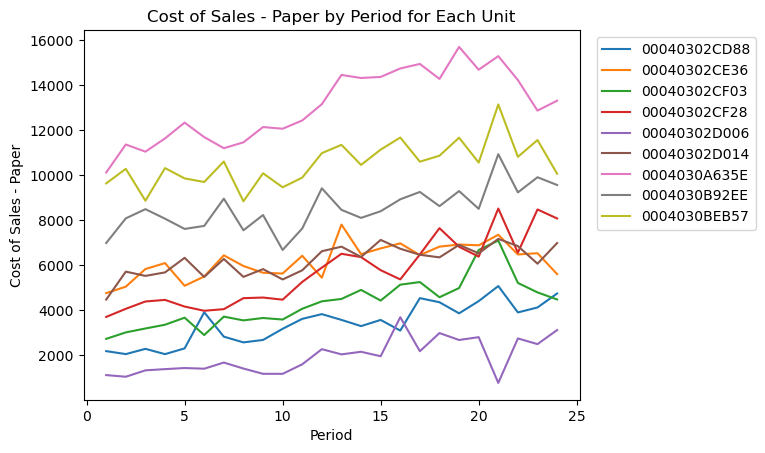

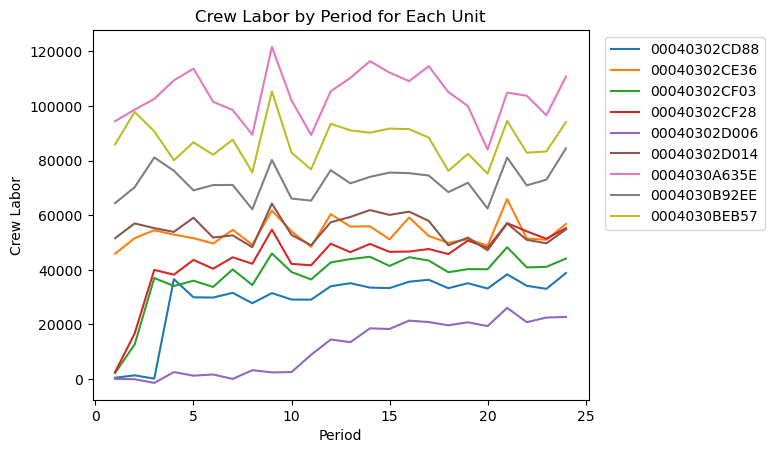

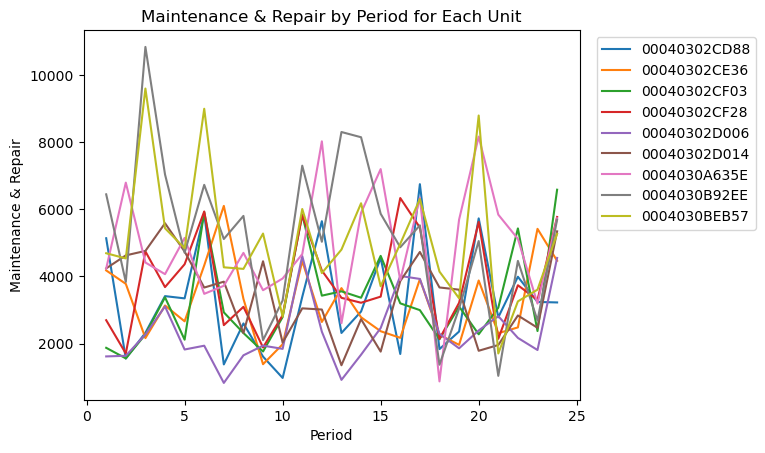

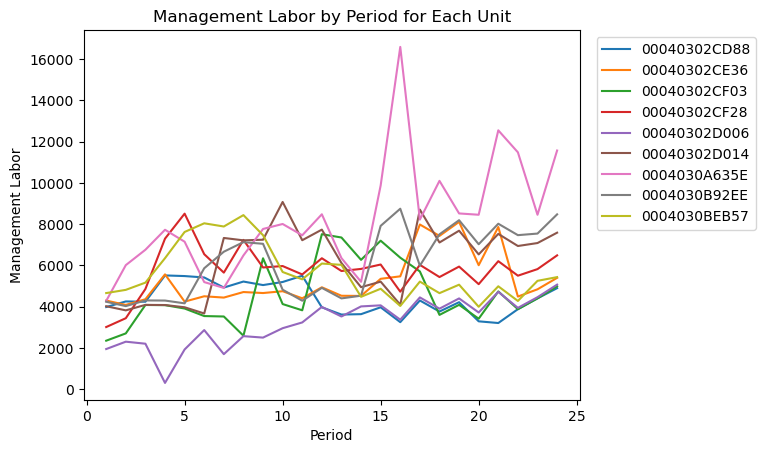

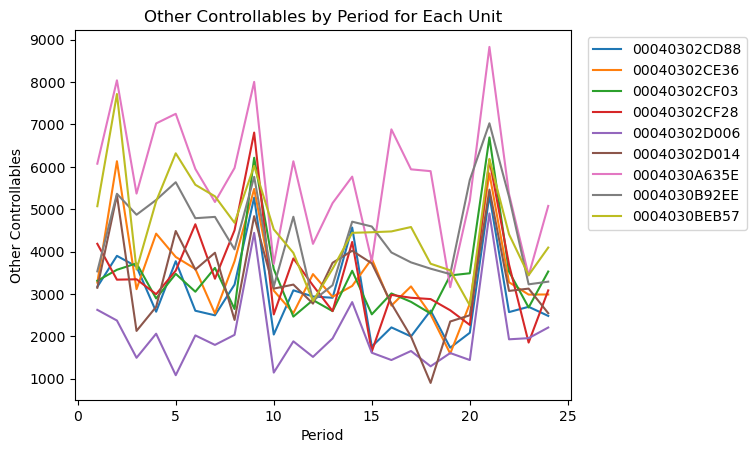

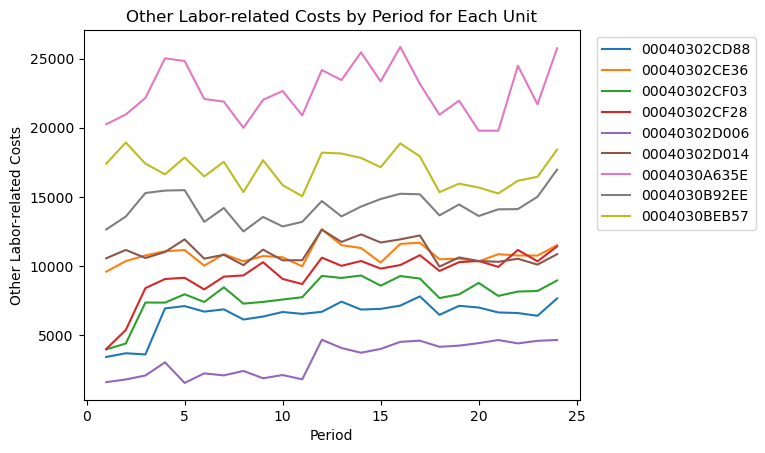

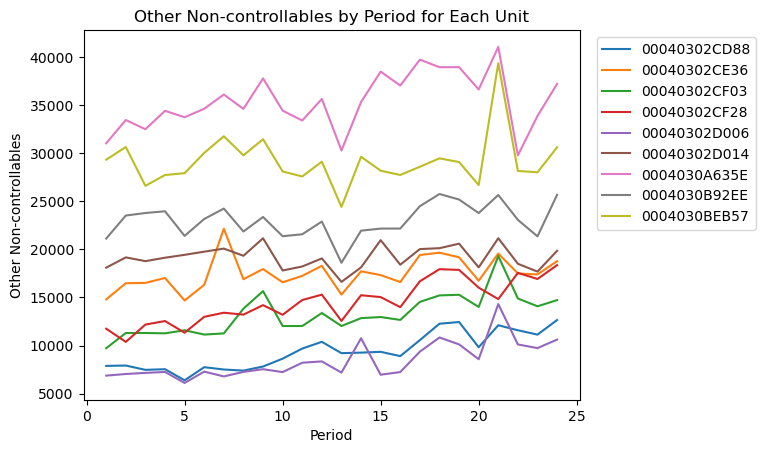

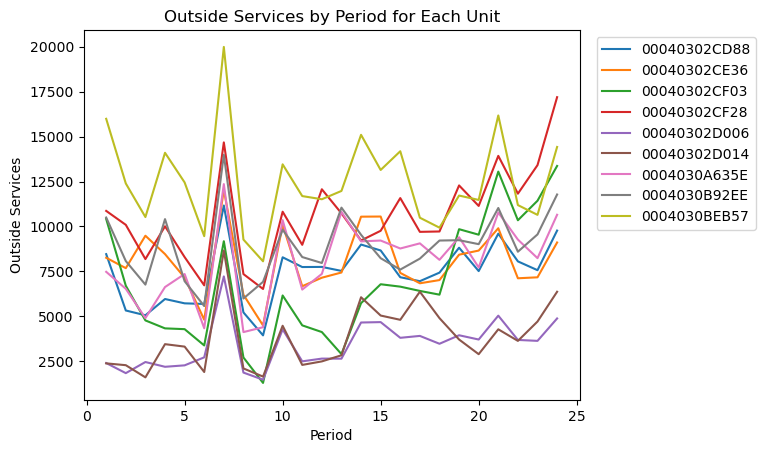

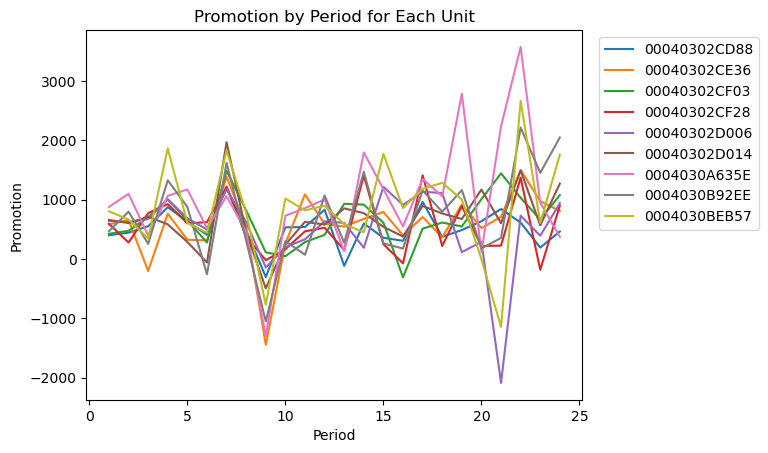

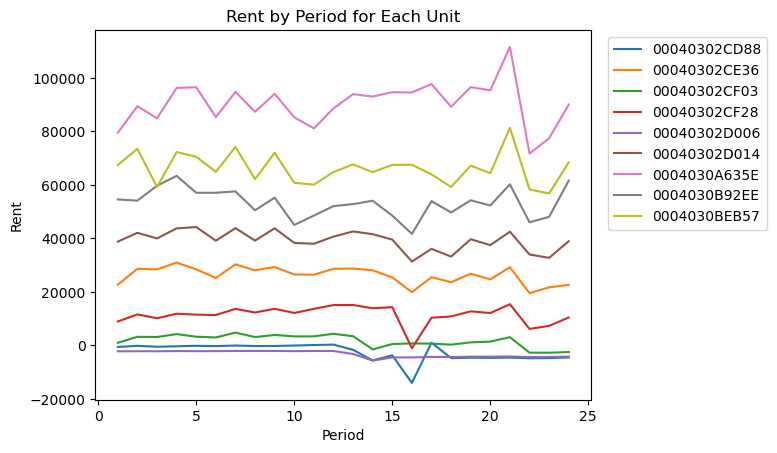

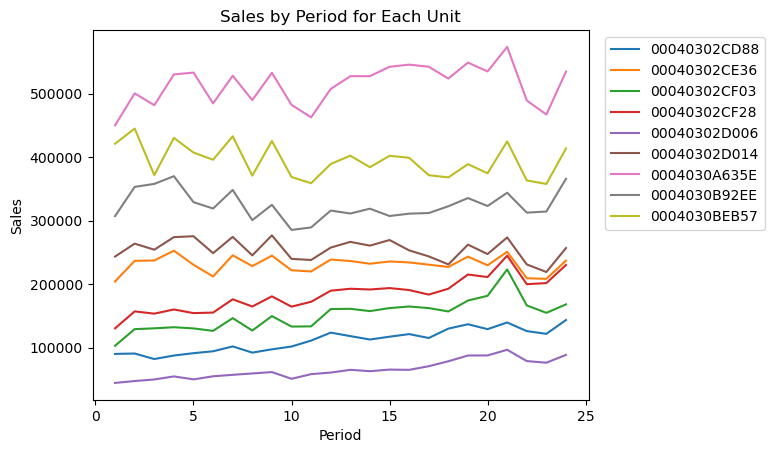

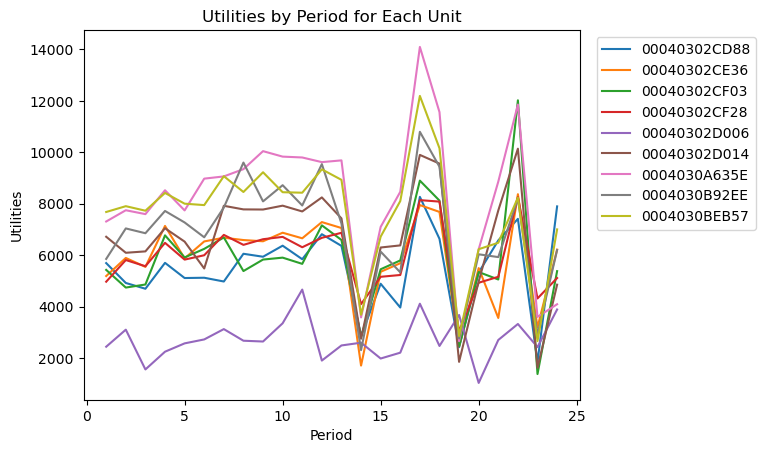

In [23]:
# Make a line chart of the amount in each account over the dataset
account_columns = unmelt.columns[3:16]
periods = unmelt['Period'].unique()

# Iterate over the account columns
for account in account_columns:
    # Pivot the data for the current account
    account_data = unmelt.pivot(index='Unit', columns='Period', values=account)
    
    # Create the line chart
    ax = account_data.T.plot()
    
    # Set the title and labels
    plt.title(f'{account} by Period for Each Unit')
    plt.xlabel('Period')
    plt.ylabel(account)
    
    # Adjust the legend position
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
    
    # Display the chart
    plt.show()


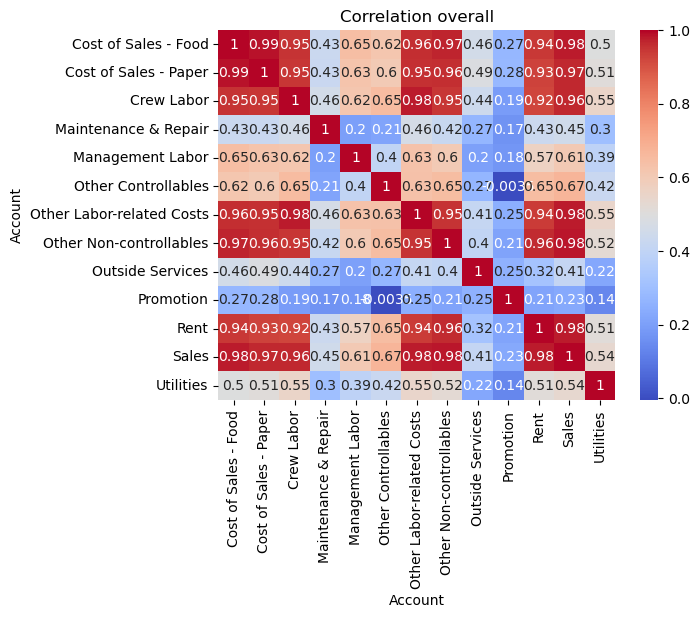

In [24]:
# Do corr matrix of columns across firms
# Select only account column
account_columns = unmelt.columns[3:16]
# Make correlation matrix
corrm1 = unmelt[account_columns].corr()
# Create heatmap
sns.heatmap(corrm1, annot=True, cmap='coolwarm')
# Title
plt.title('Correlation overall')
plt.show()

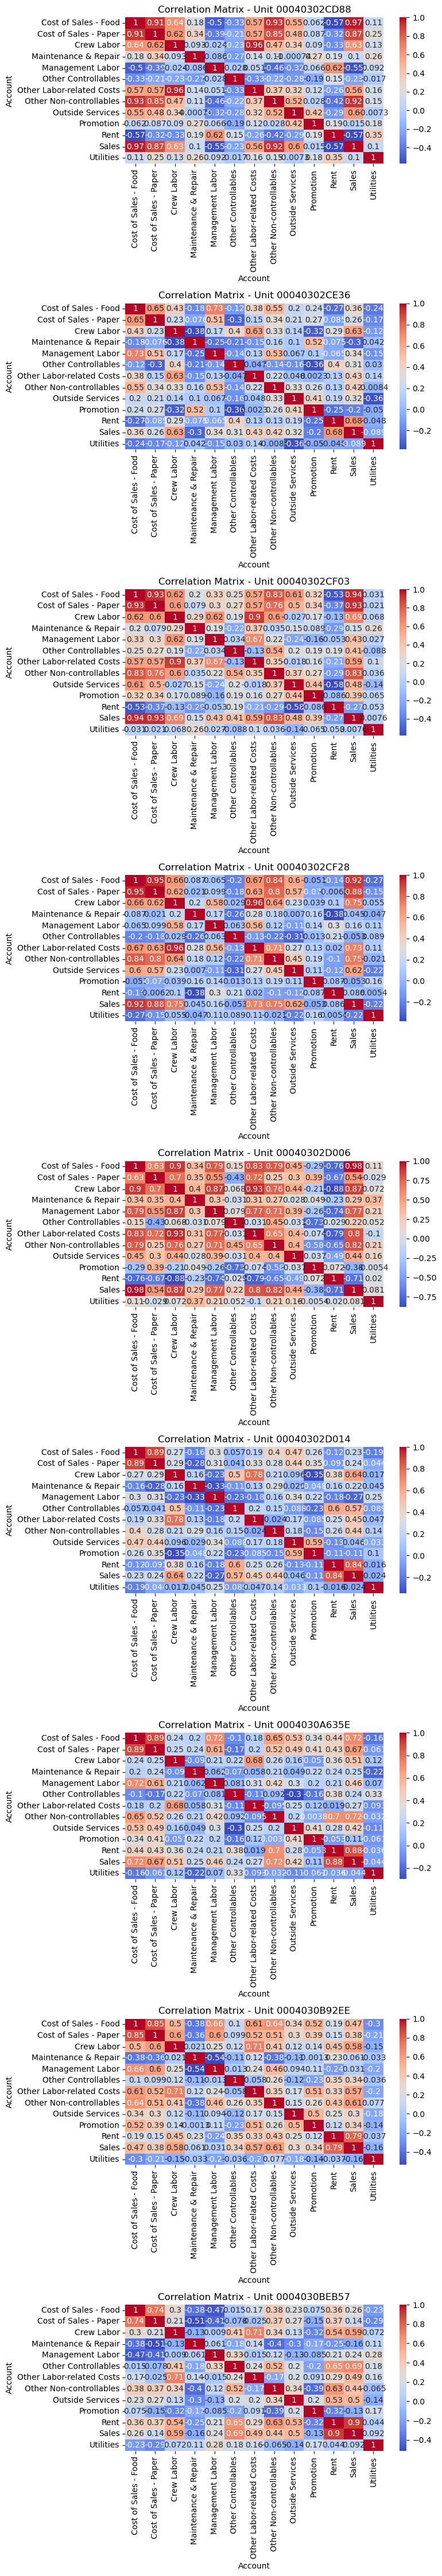

In [25]:
account_columns = unmelt.columns[3:16]
units = unmelt['Unit'].unique()
num_units = len(units)

# Calculate the number of rows and columns for subplots
num_rows = num_units
num_cols = 1

# Create subplots for each unit
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 5 * num_units))

# Iterate over the units and create a heatmap for each unit
for i, unit in enumerate(units):
    unit_df = unmelt[unmelt['Unit'] == unit]
    correlation_matrix = unit_df[account_columns].corr()

    ax = axes[i]
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)
    ax.set_title(f'Correlation Matrix - Unit {unit}')

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()
